## 🧠 MNIST Image Classification with a Neural Network

### 📦 Objective:
Train a basic neural network to recognize handwritten digits (0–9) from grayscale images in the MNIST dataset.

---

### 🔧 Step-by-Step Breakdown

#### 🔹 Step 1: Import Libraries

In [4]:
!pip install -q tensorflow matplotlib seaborn numpy scikit-learn

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

2025-08-01 05:10:39.761116: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-01 05:10:39.769457: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-01 05:10:39.786023: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754025039.812358    4538 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754025039.819865    4538 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754025039.839620    4538 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

---

#### 🔹 Step 2: Load and Preprocess Data

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

---

#### 🔹 Step 3: Visualize Sample Images

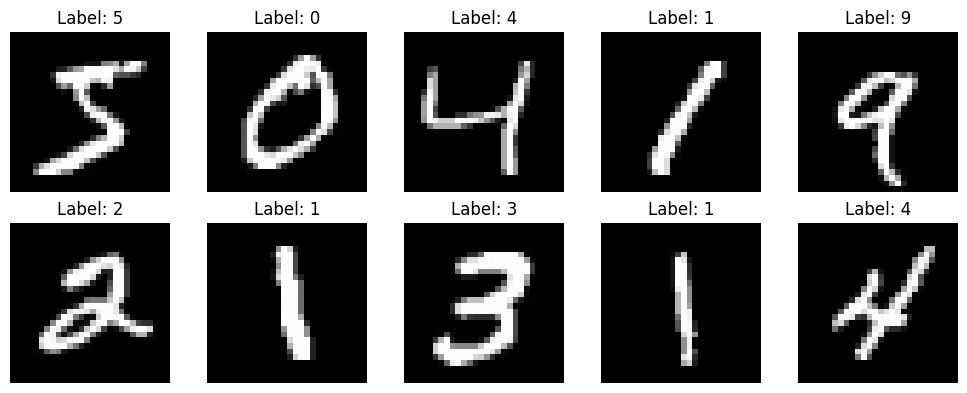

In [8]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i].argmax()}")
    plt.axis('off')
plt.tight_layout()
plt.show()

---

#### 🔹 Step 4: Build the Neural Network Model

 - A Flatten layer reshapes a multi-dimensional input into a one-dimensional vector. It doesn't learn anything; it just restructures the data.

- A Dense layer is a fully-connected layer that performs learning. It uses weights and biases to learn patterns from the input it receives.

In [9]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

2025-08-01 05:13:17.206249: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


---

#### 🔹 Step 5: Compile the Model

 - categorical_crossentropy is a loss function used for multi-class classification that measures the difference between the true labels (which must be one-hot encoded) and the predicted probabilities from the model's softmax output.

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

---

#### 🔹 Step 6: Train the Model

In [11]:
model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9207 - loss: 0.2729 - val_accuracy: 0.9607 - val_loss: 0.1381
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9656 - loss: 0.1145 - val_accuracy: 0.9576 - val_loss: 0.1377
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9760 - loss: 0.0793 - val_accuracy: 0.9701 - val_loss: 0.1037
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9815 - loss: 0.0574 - val_accuracy: 0.9732 - val_loss: 0.0878
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9852 - loss: 0.0449 - val_accuracy: 0.9697 - val_loss: 0.1058


---

#### 🔹 Step 7: Evaluate Performance

In [12]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9696 - loss: 0.0967
Test Accuracy: 0.97


---

## 🔍 Module 2: Visualizing Model Decisions


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


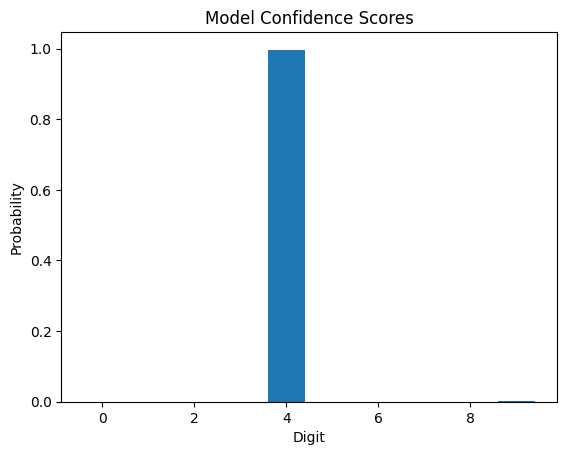

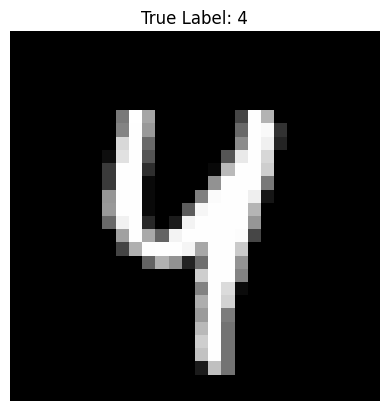

In [13]:
import numpy as np

# Select a test image
test_idx = 42
image = x_test[test_idx].reshape(1, 28, 28)
prediction = model.predict(image)[0]

# Display prediction scores
plt.bar(range(10), prediction)
plt.title("Model Confidence Scores")
plt.xlabel("Digit")
plt.ylabel("Probability")
plt.show()

# Display the actual image
plt.imshow(x_test[test_idx], cmap='gray')
plt.title(f"True Label: {y_test[test_idx].argmax()}")
plt.axis('off')
plt.show()

> 💬 **Takeaway:** This shows not only what the model predicted, but how confident it is about each digit.

---

### 🔹 Step 3: Visualize Misclassifications

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


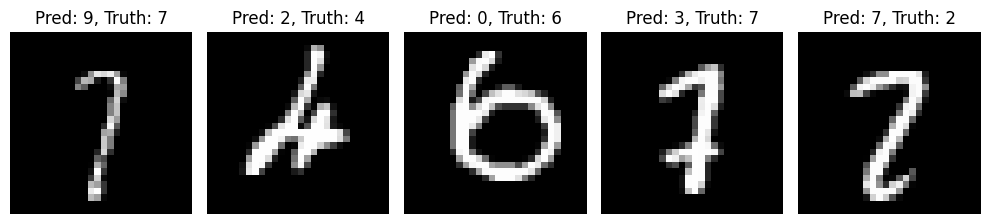

In [14]:
preds = model.predict(x_test)
pred_labels = preds.argmax(axis=1)
true_labels = y_test.argmax(axis=1)

# Find incorrect predictions
errors = np.where(pred_labels != true_labels)[0]

# Visualize a few
plt.figure(figsize=(10, 4))
for i in range(5):
    idx = errors[i]
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"Pred: {pred_labels[idx]}, Truth: {true_labels[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()